In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam,SGD
from keras.layers import Conv2D,MaxPooling2D,Input,BatchNormalization,ReLU,Flatten,Dense
from keras.callbacks import ModelCheckpoint

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
train_labels.shape

(50000, 10)

## No Batch Normalization

In [6]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 278s 178ms/step - loss: 2.2240 - accuracy: 0.1642 - val_loss: 1.9267 - val_accuracy: 0.2972
Epoch 2/10
1563/1563 [==============================] - 279s 179ms/step - loss: 1.7688 - accuracy: 0.3652 - val_loss: 1.6698 - val_accuracy: 0.4118
Epoch 3/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.5287 - accuracy: 0.4503 - val_loss: 1.4822 - val_accuracy: 0.4738
Epoch 4/10
1563/1563 [==============================] - 276s 176ms/step - loss: 1.3854 - accuracy: 0.5055 - val_loss: 1.3102 - val_accuracy: 0.5330
Epoch 5/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.2776 - accuracy: 0.5416 - val_loss: 1.3068 - val_accuracy: 0.5307
Epoch 6/10
1563/1563 [==============================] - 276s 177ms/step - loss: 1.1735 - accuracy: 0.5875 - val_loss: 1.2596 - val_accuracy: 0.5433
Epoch 7/10
1563/1563 [==============================] - 277s 177ms/step - loss: 1.0723 - accuracy: 0.6208 - val_

313/313 - 14s - loss: 0.9273 - accuracy: 0.6733


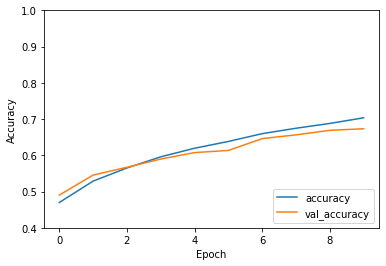

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# 2 dense layer

In [9]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 138s 88ms/step - loss: 2.0822 - accuracy: 0.2311 - val_loss: 1.9007 - val_accuracy: 0.3217
Epoch 2/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5839 - accuracy: 0.4365 - val_loss: 1.4156 - val_accuracy: 0.4859
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3845 - accuracy: 0.5083 - val_loss: 1.3112 - val_accuracy: 0.5337
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.2520 - accuracy: 0.5552 - val_loss: 1.3887 - val_accuracy: 0.5095
Epoch 5/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.1573 - accuracy: 0.5951 - val_loss: 1.2651 - val_accuracy: 0.5564
Epoch 6/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0806 - accuracy: 0.6194 - val_loss: 1.1887 - val_accuracy: 0.5912
Epoch 7/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0074 - accuracy: 0.6484 - val_loss: 1

313/313 - 6s - loss: 1.0057 - accuracy: 0.6463


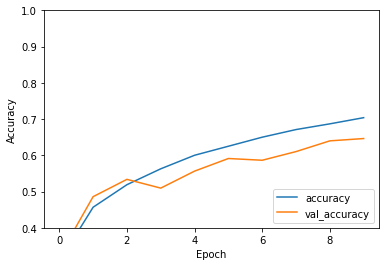

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## with batchnormalization

## 3 blocks of Conv2D ->BatchNorm2D->MaxPooling2D

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 131s 83ms/step - loss: 1.6536 - accuracy: 0.4168 - val_loss: 1.2368 - val_accuracy: 0.5494
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0831 - accuracy: 0.6163 - val_loss: 1.0230 - val_accuracy: 0.6352
Epoch 3/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9264 - accuracy: 0.6716 - val_loss: 1.4663 - val_accuracy: 0.5126
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.8315 - accuracy: 0.7079 - val_loss: 1.1553 - val_accuracy: 0.6100
Epoch 5/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.7454 - accuracy: 0.7354 - val_loss: 1.0423 - val_accuracy: 0.6422
Epoch 6/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.6849 - accuracy: 0.7560 - val_loss: 1.1651 - val_accuracy: 0.6296
Epoch 7/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6280 - accuracy: 0.7807 - val_loss: 1

313/313 [==============================] - 7s 21ms/step - loss: 1.3800 - accuracy: 0.6078


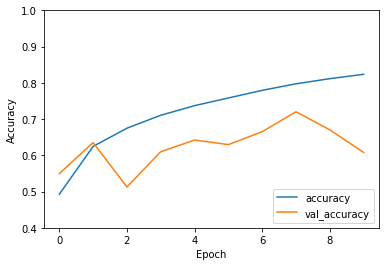

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels)

## with batchnormalization

## 2 blocks of Conv2D ->BatchNorm2D->MaxPooling2D

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.6237 - accuracy: 0.4245 - val_loss: 2.1586 - val_accuracy: 0.3588
Epoch 2/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0661 - accuracy: 0.6228 - val_loss: 1.0750 - val_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.8868 - accuracy: 0.6885 - val_loss: 1.5599 - val_accuracy: 0.5288
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7802 - accuracy: 0.7236 - val_loss: 1.2096 - val_accuracy: 0.6087
Epoch 5/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.6878 - accuracy: 0.7597 - val_loss: 1.1027 - val_accuracy: 0.6351
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.6071 - accuracy: 0.7868 - val_loss: 1.1122 - val_accuracy: 0.6472
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.5433 - accuracy: 0.8096 - val_loss: 1

313/313 [==============================] - 6s 18ms/step - loss: 1.1184 - accuracy: 0.6698


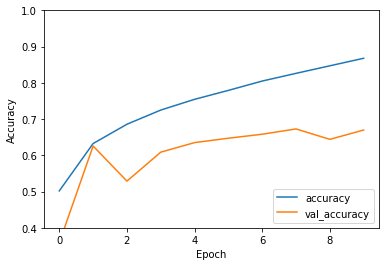

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels)

# best model from the thsese options
1) Unormalised(without batch normalization)

2) 2d block of Conv2D ->BatchNorm2D->MaxPooling2D

3) 3d block of Conv2D ->BatchNorm2D->MaxPooling2D

In every model useses 2 dense layer ,"SGD" optimizer and "categorical_crossentropy" as a loss function

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
checkpoint_filepath = './content/sample_data'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(train_images, train_labels,epochs=50,batch_size=100,validation_data=(test_images, test_labels), 
          callbacks=[model_checkpoint_callback])

Epoch 1/50
500/500 [==============================] - 264s 526ms/step - loss: 0.7245 - accuracy: 0.7477 - val_loss: 0.8920 - val_accuracy: 0.6887
Epoch 2/50
500/500 [==============================] - 263s 526ms/step - loss: 0.6914 - accuracy: 0.7607 - val_loss: 0.8703 - val_accuracy: 0.7016
Epoch 3/50
500/500 [==============================] - 263s 525ms/step - loss: 0.6673 - accuracy: 0.7691 - val_loss: 0.8747 - val_accuracy: 0.7013
Epoch 4/50
500/500 [==============================] - 265s 529ms/step - loss: 0.6410 - accuracy: 0.7757 - val_loss: 0.8591 - val_accuracy: 0.7059
Epoch 5/50
500/500 [==============================] - 265s 529ms/step - loss: 0.6177 - accuracy: 0.7856 - val_loss: 0.8560 - val_accuracy: 0.7108
Epoch 6/50
500/500 [==============================] - 264s 528ms/step - loss: 0.6032 - accuracy: 0.7898 - val_loss: 0.8706 - val_accuracy: 0.7067
Epoch 7/50
500/500 [==============================] - 264s 528ms/step - loss: 0.5808 - accuracy: 0.8005 - val_loss: 0.8615 -

KeyboardInterrupt: ignored

##### here, this is Keyboard interrupt error , because model take more time for 50 epochs so i intrupted  after 16 epochs , still ggetting quit good accuracy about 72

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

313/313 [==============================] - 13s 41ms/step - loss: 1.3206 - accuracy: 0.7243


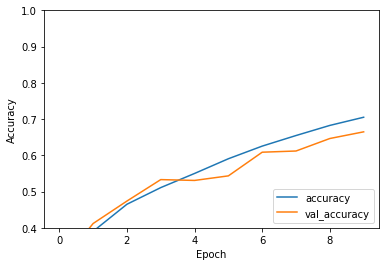

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels)